<a href="https://colab.research.google.com/github/makemepro/python_projects/blob/main/Convnets_CT_Plate_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

The Merritt Parkway, built in the 1930s, was the first highway in connecticut. Followed by Connecticut’s other major highways in the 1960s.[1] These projects were funded by a mix of federal and state funds.[2,3] Although federal funds covered the majority of costs associated with constructing the interstates in Connecticut, the burden of operation and maintenance falls almost entirely on the state. Only 4% of federal spending for highways is spent on operation and maintenance. In searching for a new source of revenue to fund the upkeep of its highway system, Connecticut implemented a gas tax in 1921.[4] Historically, another source of revenue for highway construction is tolls.

Highway tolls have been hotly debated in Connecticut politics since 1983 when a deadly accident on interstate 95 led to the removal of all highway toll booths in the state.[5,6] Part of Ned Lamont’s campaign for governor included support for installing highway tolls. However, his proposals could not get through the state legislature after he was elected. His initial proposal was whittled down and eventually dropped.[7]

A large source of road funding in the state is revenue from the gas tax, and by 2040 as many as 70% of new vehicles will not be gasoline powered.[8] That percentage could be higher if more aggressive climate policies are put in place. As electric and other zero-emission vehicles become more popular, the revenue from gas tax in Connecticut will decline. Currently around 30% of funding for roads in the state comes from the gas tax.[9] For this reason it seems the adoption of highway tolls in the state is inevitable.[10]

Some toll proposals plan on charging out-of-state drivers more than twice as much as in-state drivers.[11] Estimates for the percentage of out of state vehicles on Connecticut highways vary from 25-40%.[12] If cameras are set up along a major highway and our machine learning model works well then the state of Connecticut would have a much better idea of what percentage of drivers are from out-of-state and on which roads those drivers travel. This information would be key in deciding toll placement and rates.

> [1] CT.gov https://portal.ct.gov/DOT/Highway-Design/Merritt-Parkway-History

> [2] Merritt Parkway Conservancy https://www.merrittparkway.org/copy-of-about-the-parkway

> [3] CT.gov https://portal.ct.gov/DOT/General/History/Chapter-7-DOT-History

> [4] Tax Foundation https://taxfoundation.org/when-did-your-state-adopt-its-gas-tax/

> [5] New York Times https://www.nytimes.com/1983/01/20/nyregion/6-die-in-crash-at-toll-station-in-connecticut.html

> [6] CT.gov https://cga.ct.gov/2009/rpt/2009-R-0122.htm

> [7] Patch https://patch.com/connecticut/greenwich/gov-lamont-proposes-14-tolls-heres-where-he-wants-put-them

> [8] Bloomberg https://about.bnef.com/blog/electric-vehicle-sales-set-to-rise-faster-than-ever-but-more-policy-action-needed-to-get-on-track-for-net-zero/

> [9] Tax Foundation https://taxfoundation.org/states-road-funding-2019/

> [10] Hartford Courant https://www.courant.com/opinion/letters/hc-le-toll-debate-0213-20200213-jnxotku5o5darcfkh4komywy24-story.html

> [11] Hartford Courant https://www.courant.com/politics/hc-pol-tolls-out-state-drivers-20190522-kbhx7cp6mjb3xich4b7csvenhq-story.html

> [12] CT Mirror https://ctmirror.org/category/ct-viewpoints/drive-from-here-to-canada-without-tolls/

# **Data Gathering and Description**
Images of CT license plates were scraped from google images before being manually cleaned by the team. Before cleaning we had 451 images of CT license plates and 451 images of other license plates. After cleaning we have 344 images of CT license plates and 364 images of other license plates. We split the data to have 200 of each in training. For the test partition we have 144 CT plates and 164 for non CT plates. A copy of the data and scripts have been shared with the TA.

Below is the script used to scrape google images of license plates
https://drive.google.com/file/d/1MXRPQEQ_wUoROS8yLIxNdLhu0mHTqV9j/view?usp=sharing

Dataset
https://drive.google.com/drive/folders/1peLi_NlUcH87ejwnheaZ3HBRfrCIvhT-?usp=sharing

# **Modeling**
Fit at least two reasonable different DL models and one baseline model with clean code (lots of comments).

In [ ]:
import keras # import modules
keras.__version__

'2.6.0'

In [ ]:
from google.colab import drive, files #mount drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
path = "/content/drive/Shareddrives/OPIM5509_DL_G7/Project1/larger_dataset/" # filepath to dataset

train_dir = path + "Train"
test_dir = path + "Test"
testfinal_dir = path + "Testfinal"

In [ ]:
train_dir #folder name

'/content/drive/Shareddrives/OPIM5509_DL_G7/Project1/larger_dataset/Train'

##Model 1 Architecture

In [ ]:
from keras import layers #import modules
from keras import models
#building model 1
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))  #first layer of the model using images 150x150 that are
model.add(layers.MaxPooling2D((2, 2))) #max pooling layer
model.add(layers.Conv2D(64, (3, 3), activation='relu')) #convoluitonal layer
model.add(layers.MaxPooling2D((2, 2))) #max pooling layer
model.add(layers.Conv2D(128, (3, 3), activation='relu')) #convolutional layer
model.add(layers.MaxPooling2D((2, 2))) #max pooling layer
model.add(layers.Conv2D(128, (3, 3), activation='relu')) #convolutional layer
model.add(layers.MaxPooling2D((2, 2)))#max pooling layer
model.add(layers.Flatten())#flattening layer
model.add(layers.Dense(512, activation='relu')) #dense layer
model.add(layers.Dense(1, activation='sigmoid')) #dense layer

In [ ]:
model.summary()#summarize the model so we can see what we have built... over 3 million trainable parameters!

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

## Model 2 Architecture

In [ ]:
from keras import layers
from keras import models
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation

modelfinal = models.Sequential()

modelfinal.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3))) # This matches the size of our rescalled images
modelfinal.add(layers.MaxPooling2D((2, 2))) # max pool
modelfinal.add(Dropout(rate = 0.3)) #dropout rate to help prevent overfitting

modelfinal.add(layers.Conv2D(64, (3, 3), activation='relu')) #convolutional layer
modelfinal.add(layers.MaxPooling2D((2, 2))) # max pooling
modelfinal.add(Dropout(rate = 0.2))

modelfinal.add(layers.Conv2D(128, (3, 3), activation='relu')) #convolution
modelfinal.add(layers.MaxPooling2D((2, 2))) #max pooling layer
modelfinal.add(Dropout(rate = 0.15))

modelfinal.add(layers.Conv2D(128, (3, 3), activation='relu')) #convolutional layer
modelfinal.add(layers.MaxPooling2D((2, 2))) #max pooling layer

modelfinal.add(layers.Flatten())#flattening layer
modelfinal.add(layers.Dense(512, activation='relu')) #dense layer
modelfinal.add(layers.Dense(1, activation='sigmoid'))#dense layer

In [ ]:
model.summary()#summarize the model so we can se what we have built... over 3 million trainable parameters

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

##Model 1 Compilation

In [ ]:
from keras import optimizers#more modules
#now compile model 1
model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator#MODULES

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory( #same thing for the test dataset
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 388 images belonging to 2 classes.
Found 293 images belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_generator: #creating batches
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [ ]:
labels_batch

array([1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
       1., 0., 0.], dtype=float32)

In [ ]:
import time #modules

start = time.time() #start the clock
print("hello")

history = model.fit_generator(
      train_generator,
      steps_per_epoch=20, # 15 epochs
      epochs=10,
      validation_data=validation_generator,
      validation_steps=14)  # Total number of steps (batches of samples) to validate before stopping. this itme 14

end = time.time()#stop the clock
print(end - start)#how long did that take?

hello


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
20/20 [==============================] - 34s 2s/step - loss: 0.7720 - acc: 0.4794 - val_loss: 0.6917 - val_acc: 0.4679
Epoch 2/10
20/20 [==============================] - 32s 2s/step - loss: 0.6920 - acc: 0.5515 - val_loss: 0.6773 - val_acc: 0.7143
Epoch 3/10
20/20 [==============================] - 32s 2s/step - loss: 0.6637 - acc: 0.6366 - val_loss: 0.6003 - val_acc: 0.6929
Epoch 4/10
20/20 [==============================] - 33s 2s/step - loss: 0.5948 - acc: 0.6959 - val_loss: 0.5181 - val_acc: 0.7250
Epoch 5/10
20/20 [==============================] - 33s 2s/step - loss: 0.6180 - acc: 0.6701 - val_loss: 0.6692 - val_acc: 0.6500
Epoch 6/10
20/20 [==============================] - 32s 2s/step - loss: 0.5994 - acc: 0.7088 - val_loss: 0.5759 - val_acc: 0.6929
Epoch 7/10
20/20 [==============================] - 32s 2s/step - loss: 0.5157 - acc: 0.7526 - val_loss: 0.5218 - val_acc: 0.7179
Epoch 8/10
20/20 [==============================] - 34s 2s/step - loss: 0.4295 - acc: 0.80

## Model 1 Results: Accuracy/Loss Plot
We can see that the accuracy in model1 is highest at Epoch 10 with an accuracy of 73%. The loss curve of the training continually decreases up to 10 epochs. The validation loss reaches its minimum at around 3 and 6 epochs then increases. We have a bit of overfitting since our data set is small.

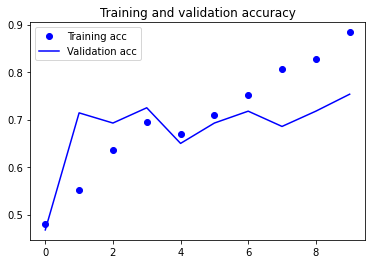

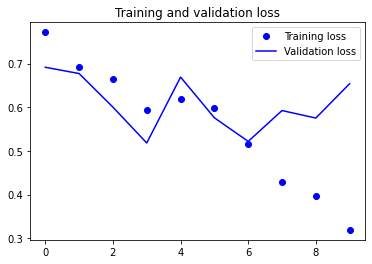

In [ ]:
import matplotlib.pyplot as plt#more modules

#giving these things definitions so it will be easier to plot them
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')#label the dots
plt.plot(epochs, val_acc, 'b', label='Validation acc')#label the line
plt.title('Training and validation accuracy') #give the plot a title
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')#label the dots
plt.plot(epochs, val_loss, 'b', label='Validation loss')#label the line
plt.title('Training and validation loss')#give the second plot a title
plt.legend()

plt.show()

## Model 2 Compilation

In [ ]:
from keras import optimizers#more modules

modelfinal.compile(loss='binary_crossentropy',#compiling model 2
              optimizer='rmsprop',
              metrics=['acc'])

In [ ]:
import time#importing more modules

start = time.time() #start the clock
print("hello")

historyfinal = modelfinal.fit_generator(
      train_generator,
      steps_per_epoch=20, # 20 epochs
      epochs=10,
      validation_data=validation_generator,
      validation_steps=14)  #  Total number of steps (batches of samples) to validate before stopping. this time 14

end = time.time()#stop the clock
print(end - start)#tells us how long it took to run

hello


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
20/20 [==============================] - 36s 2s/step - loss: 1.0239 - acc: 0.5052 - val_loss: 0.6923 - val_acc: 0.4750
Epoch 2/10
20/20 [==============================] - 34s 2s/step - loss: 0.6999 - acc: 0.5515 - val_loss: 0.6930 - val_acc: 0.4607
Epoch 3/10
20/20 [==============================] - 34s 2s/step - loss: 0.7357 - acc: 0.5284 - val_loss: 0.6900 - val_acc: 0.4750
Epoch 4/10
20/20 [==============================] - 34s 2s/step - loss: 0.6749 - acc: 0.5799 - val_loss: 0.6795 - val_acc: 0.6679
Epoch 5/10
20/20 [==============================] - 34s 2s/step - loss: 0.6527 - acc: 0.6211 - val_loss: 0.6000 - val_acc: 0.6964
Epoch 6/10
20/20 [==============================] - 34s 2s/step - loss: 0.6462 - acc: 0.6289 - val_loss: 0.6223 - val_acc: 0.6857
Epoch 7/10
20/20 [==============================] - 34s 2s/step - loss: 0.6151 - acc: 0.6572 - val_loss: 0.5878 - val_acc: 0.6643
Epoch 8/10
20/20 [==============================] - 34s 2s/step - loss: 0.5495 - acc: 0.72

## Model 2 Results: Accuracy/Loss Plot
To help overcome our overfitting we added a few dropouts between our conv2d layers. For the accuracy curve, we can see the training and validation accuracy are much closer. The accuracy of the validation reaches a maximum of 10 epochs with 73% accuracy. The validation loss curve reaches a minimum at 7 epochs

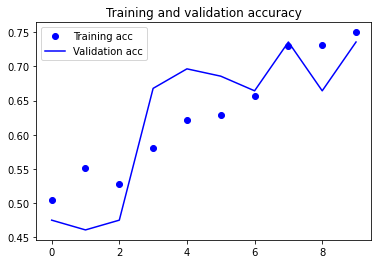

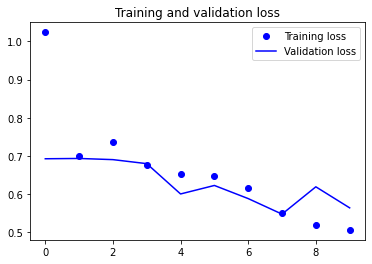

In [ ]:
import matplotlib.pyplot as plt#import more modules

#define these to make plotting easier
acc = historyfinal.history['acc']
val_acc = historyfinal.history['val_acc']
loss = historyfinal.history['loss']
val_loss = historyfinal.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')#label the dots
plt.plot(epochs, val_acc, 'b', label='Validation acc')#label the line
plt.title('Training and validation accuracy')#title the first plot
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')#label the dots
plt.plot(epochs, val_loss, 'b', label='Validation loss')#label the line
plt.title('Training and validation loss')#title the second plot
plt.legend()

plt.show()

# **Result and Discussion**
Includes learning curves for all models and actual vs. time series plot (if appropriate); for regression - scatterplots, error metrics for train and test partition; for classification or multiclass - confusion matrix and classification report. Includes detailed bullet points that describe what we see from each of the results, ties results to the business problem.


##Model1 Results

In [ ]:
test_loss, test_acc = model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [ ]:
print(test_loss, test_acc)

0.656348705291748 0.7542662024497986


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np

filenames  = validation_generator.filenames
nb_samples = len(filenames)/20
# see how the model did!
preds = model.predict_generator(validation_generator,steps = nb_samples)

preds = np.argmax(preds, axis=1)
preds


print(confusion_matrix(validation_generator.classes, preds))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


[[136   0]
 [157   0]]


In [ ]:
print(classification_report(validation_generator.classes, preds))

##Model2 Results


In [ ]:
test_lossf, test_accf = modelfinal.evaluate_generator(validation_generator)
print(test_lossf, test_accf)


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np

# see how the model did!
predf = modelfinal.predict_generator(validation_generator)
predf = np.argmax(predf, axis=1)
predf


print(confusion_matrix(validation_generator.classes, predf))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


[[136   0]
 [157   0]]


In [ ]:
print(classification_report(validation_generator.classes, predf))

              precision    recall  f1-score   support

           0       0.46      1.00      0.63       136
           1       0.00      0.00      0.00       157

    accuracy                           0.46       293
   macro avg       0.23      0.50      0.32       293
weighted avg       0.22      0.46      0.29       293



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Baseline Model

A baseline model of random guessing would be correct half of the time since our training partition has 200 CT plates and 200 non-CT plates. Therefore, the baseline accuracy would be 50%

# **Conclusion**
Five bullet points that sum up everything you did and how it solves the business problem.

* Images of CT license plates and random plates were scrapped from Google images
* Covnet models were created in an attempt to distinguish Connecticut license plates from all other states.
* Models could predict CT plates with up to 73% accuracy.
* Results from these models could help determine what percentage of out of state drivers are driving on Connecticut highways.
* Information would be useful to leaders drafting legislation for toll locations and rate setting.